In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
df = pd.read_csv('DATASETS\cluster_evaluation_dataset.csv')

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21400\4133616817.py:9: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('DATASETS\cluster_evaluation_dataset.csv')


In [2]:
df.head()

,Point,X,Y,True_Label,Cluster_Assignment
0,A,1,2,1,1
1,B,2,3,1,1
2,C,3,4,1,2
3,D,8,8,2,2
4,E,9,9,2,2


In [3]:
cluster_1 = df[df['Cluster_Assignment'] == 1]
cluster_2 = df[df['Cluster_Assignment'] == 2]
cluster_1_true = df[df['True_Label'] == 1] 
cluster_2_true = df[df['True_Label'] == 2]

<Axes: xlabel='X', ylabel='Y'>

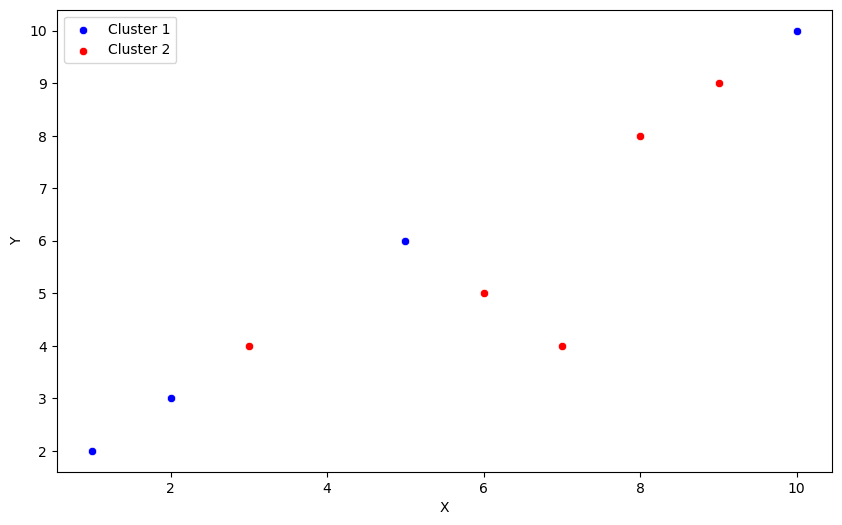

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=cluster_1, color='blue', label='Cluster 1')
sns.scatterplot(x='X', y='Y', data=cluster_2, color='red', label='Cluster 2')


<Axes: xlabel='X', ylabel='Y'>

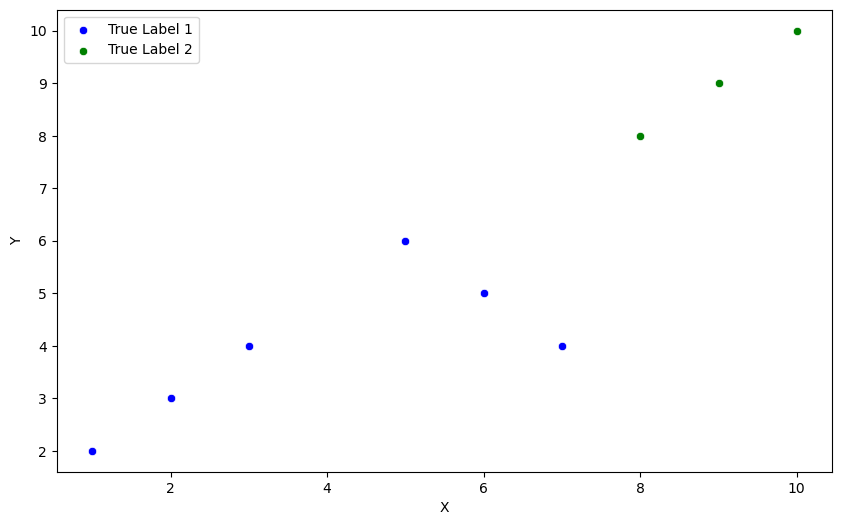

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=cluster_1_true, color='blue', label='True Label 1')
sns.scatterplot(x='X', y='Y', data=cluster_2_true, color='green', label='True Label 2')

In [9]:
# Calculate the silhouette score
print(silhouette_score(df[['X', 'Y']], df['Cluster_Assignment']))

# Calculate the silhouette score for true clusters
print(silhouette_score(df[['X', 'Y']], df['True_Label']))

0.16630009754403913
0.6137382058662159


In [11]:
from scipy.spatial.distance import cdist

def silhouette_score_manual(X, labels):
    unique_labels = np.unique(labels)
    n_clusters = unique_labels.shape[0]
    
    if n_clusters == 1 or n_clusters == len(X):
        return 0
    
    centroids = np.array([X[labels == label].mean(axis=0) for label in unique_labels])
    distances = cdist(X, centroids, 'euclidean')
    
    a = np.array([distances[i, labels[i]] for i in range(len(X))])
    b = np.array([np.min([distances[i, j] for j in range(n_clusters) if j != labels[i]]) for i in range(len(X))])
    
    silhouette_scores = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_scores)

X = df[['X', 'Y']].values
labels = df['Cluster_Assignment'].values

print(silhouette_score_manual(df[['X', 'Y']], df['Cluster_Assignment']))

true_labels = df['True_Label'].values
print(silhouette_score_manual(df[['X', 'Y']], df['True_Label']))

IndexError: index 4 is out of bounds for axis 1 with size 4